<a href="https://colab.research.google.com/github/taha-gktn/ANN-Projects/blob/main/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization, Conv2D, Flatten,MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

# data
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
# scale
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [5]:
# Önce fazla boyutları
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

# Sonra tekrar one-hot encoding uygula
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)  # (50000, 10) olmalı
print(y_test.shape)   # (10000, 10) olmalı


(50000, 10)
(10000, 10)


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 10)

In [8]:
inputs = Input(shape=(32, 32, 3))

x = Conv2D(16, 3, padding="same", kernel_initializer="he_normal")(inputs)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(32, 3, padding="same", kernel_initializer="he_normal")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Conv2D(64, 3, padding="same", kernel_initializer="he_normal")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

x = Flatten()(x)

x = Dense(128, kernel_initializer="he_normal")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)

outputs = Dense(10, activation="softmax")(x)

basic_cnn = Model(inputs=inputs, outputs=outputs)

In [9]:
optimizerAdam = Adam(learning_rate= 0.001)

#                                           ya da tf.keras.loses.CategoricalCrossentropy
#               label verilerimizi categoric hale getirdiğimiz için bu lossu kullanıyoruz
#               diğer yolu aşşağıda yorum satırına ekleyeceğim
basic_cnn.compile(optimizer= optimizerAdam, loss = "categorical_crossentropy", metrics=["accuracy"])

In [10]:
# Farklı yollar

# 1 - One Hot yapılmayan veri

# Eğer yukarıda verimizi to_categorical yapmasaydık , neden yapmıyoruz diye aklına gelebilir çünkü örneğin elimizde 500 farklı sınıf(class) olan bir veri olduğunu düşünelim one hot hale getirdiğimiz zaman şu şekilde bir yapı oluşur : Örneğin class 5 e ait olsun veri
#                               [0,0,0,0,0,1,0,0,0,0,0 ..... ]  450 ye kadar
# Bu da verisel olarak sıkıntı yaratacağından bazı durumlarda sparsecategoricalcrosentropy kullanmamız gerekiyor.

#  Bu tarz veriler sayısal veriler oluyor örneğin sınıfları 1, 2, 3, 4, 5 diye devam ediyor


# Yola gelelim:

# y_train = to_categorical(y_train)  # Bu iki satır one hot hale getiren satırlar yapmadığımızı
# y_test = to_categorical(y_test)    # varsayalım


# Bu durumda
# basic_cnn.compile(optimizer= optimizerAdam,
#                   loss= "sparse_categorical_crossentropy",   # Bu şekilde
#                   metrics= ["accuracy"])
#                                                               ya da
# basic_cnn.compile(optimizer=optimizerAdam,
#                   loss= tf.keras.losses.SparseCategoricalCrossentropy()) # Şekilinde yazılabilir


# 2 - output katmanında Softmax Kullanılmadığında

# outputs = Dense(10) # Bu şekilde herhangi bir activation vermeyedebiliriz bu durumda aşşağıdaki şekilde yazarak softmaxı lossumuzun içinde kullanmalıyız

# from_logits = True yazarak softmax fonksiyonunun burada uygulanmasını sağlayabiliriz
# Bunu neden yapıyoruz tek bir yerde ikisi de hesaplandığından nümerik olarak daha stabil olabiliyormuş

# basic_cnn.compile(optimizer=optimizerAdam,
#                   loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True))

In [11]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(min_delta = 0.01, patience = 10, restore_best_weights = True)

In [12]:
basic_cnn.fit(x_train, y_train,
              epochs = 40,
              batch_size = 32, # Default değeri normalde de 32 hiç yazmayabilirdik
              validation_data = (x_test, y_test),
              callbacks = [early_stopping]) # Yukarıda yazdığımız early_stoppingi buraya callback olarak ekledik
                                            # Burada yapacağı şey modelimizdeki defalut olarak "val_loss" değeri
                                            # min_delta kısmındaki yazdığımız değer kadar iyileşme göstermiyorsa
                                            # patience(sabır) değerine verdiğimiz miktar kadar bekler ardından modeli durdurur
                                            # restore_best_weights parametresi ise o zamana kadarki en iyi ağırlıkları getirir

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.4831 - loss: 1.4516 - val_accuracy: 0.6683 - val_loss: 0.9223
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - accuracy: 0.7323 - loss: 0.7706 - val_accuracy: 0.6563 - val_loss: 0.9836
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8457 - loss: 0.4642 - val_accuracy: 0.6942 - val_loss: 0.8931
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9357 - loss: 0.2191 - val_accuracy: 0.6556 - val_loss: 1.2304
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9671 - loss: 0.1154 - val_accuracy: 0.6251 - val_loss: 1.6324
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9760 - loss: 0.0806 - val_accuracy: 0.6609 - val_loss: 1.5140
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9809 - loss: 0.0650 - val_accuracy: 0.6799 - val_loss: 1.4717
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9806 - loss: 

In [13]:
# Basic CNN modelimizde aldığımız sonuçlar

basic_cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6909 - loss: 0.9006


[0.8931491374969482, 0.6941999793052673]

# Notlarım

In [14]:
# Bu veride Kullanılmayacak Olsada Kendi Notlarım Olarak Ayarladığım İçin Functional API Hakkındaki Diğer Şeyler

## **Multi-Input , Multi-Output**

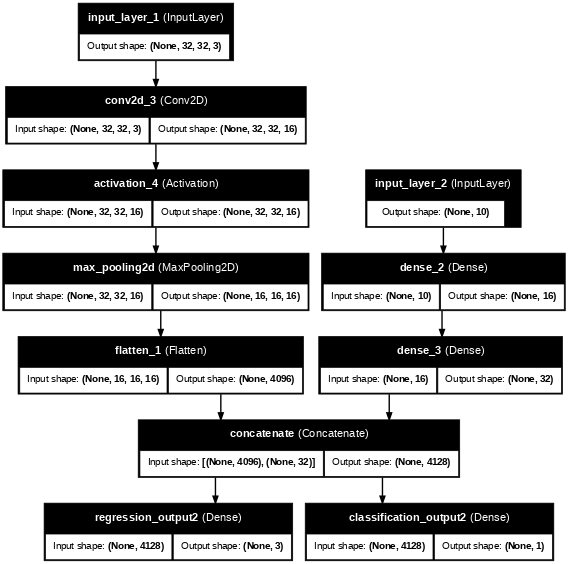

In [15]:
# Tabiki sadece aşşağıdaki gibi bir model değil farklı farklı bir sürü model oluşturabiliriz functional Api bize farklı farklı bir sürü çeşit
# model oluşturma esnekliği sağlıyor bunlar sadece birer örnek



from tensorflow.keras.layers import Concatenate
# Burada Görüntü ve sayısal olarak iki tane verimiz olacak en sonda bunları tek bir outputta birleştireceğiz


def multi_input_model():
  image_input = Input(shape=(32, 32, 3), name = "categorical input")

  x = Conv2D(16,3 , padding= "same")(image_input)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  x = Conv2D(32, 3, padding= "same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  x = Flatten()(x) # Bunun yerinde ileride GloabalAveragePooling Kullanımı da aynı işlemi farklı bir şekilde yapıyor
                   # Flatten bu işlemin sonunda 8, 8, 64) şekline sahip tensörü (8 × 8 × 64) = (4096,) haline getiriyor
                   # Dezavantajı Parametre sayısını çok artırabilir. Büyük bir tensörü dümdüz yapınca,
                   # çok fazla ağırlık içeren büyük bir tam bağlı katmana ihtiyaç duyar.

                   # GlobalAveragePooling çok yüksek miktarda parametre azaltımı yapıyor , overfittingi azaltıyor,
                   # Feature Maplerin özelliklerini daha iyi yansıtıyor
                   # Dezavantajı Çok fazla bilgi kaybına sebep olabilr
                   # Küçük boyutlu feature maplerde anlamlı sonuçlar vermeyebiliyor

# Şimdi sayısal veri

  num_input = Input(shape=(5,), name = "numerical_input")
  y = Dense(64, activation="relu")(num_input)
  y = Dense(128, activation="relu")(y)


  merged = Concatenate()([x, y])


  output = Dense(1, activation = "linear", name = "output")(merged)

  mlin_model = Model(inputs = [image_input, num_input], outputs = outputs)

  mlin_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                    loss = ["mse"],
                    metrics = ["mae"])

  return mlin_model

# ------------------------------------------------------------------- #
#                   Multi Output Model

def multi_output_model():
  input1 = Input(shape=(10, ), name = "input") # inputumuz burada tek

  x = Dense(32, activation = "relu")(input1)
  x = Dense(64, activation = "relu")(x)

  regression_output = Dense(1, activation = "linear", name = "regression_output")(x)


  classification_output = Dense(3, activation = "softmax", name = "classification_output")(x)

  mopt_model = Model(inputs = input1, outputs = [regression_output, classification_output])

  mopt_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                    loss = {"regression_output" : "mse",            # İki ayrı çıktımız için iki ayrı kayıp fonksiyonu ve metrics
                            "classification_output" : "categorical_crossentropy"},
                    metrics = {"regression_output" : "mae",
                               "classification_output" : "accuracy"})             # İkisi de tek bir kayıp fonksiyonu ile çalışabilecek olsaydı dahi
                                                                                   # İksii içinde ayrı ayrı yazmak syntax açısından da sistem açısından
                                                                                   # daha iyi sanırım hem metrics hem loss açısından
  return mopt_model

# ---------------------------------------------------------------------- #
#                 Hem Multi İnput Hem Multi Output


# Yukarıkdakilere çizmedim ama bunu anlamak diğer ikisini anlamak gibi bir şey o yüzden ;

#
# input1(image) --> Conv2D --> MaxPooling2D --> Flatten -->                             --> classification_output()(merged)
#                                                             # Merge(Concatanate) -->
# input2(numeric) --> Dense(16) --> Dense(32) ------------- >                           --> regression_output()(merged)

# Yukarıdaki şema tarzında bir model oluşturacağız buradakinden farklı yapılması gereken işleme , veriye göre farklı farklı birsürü farklı model türü
# tabiki olabiliyor bu yukarıdada yazdığım gibi sadece bir örnek



def multi_input_multi_output():

  image_data = Input(shape=(32, 32, 3))

  x = Conv2D(16, 3, padding = "same")(image_data)
  x = Activation("relu")(x)
  x = MaxPooling2D()(x)
  x = Flatten()(x)


  numerical_data = Input(shape=(10, ))
  y = Dense(16, activation = "relu")(numerical_data)
  y = Dense(32, activation = "relu")(y)

  # Merge işlemi ! Bu kısım Modelden modele ileride TransferLearning kısmında falan da değişiyor add, concatanate, Multiply, Subtract,
  # Average, Maximum tarzında farklı merge etme işlemleri de var şuanda concatanate kullanacağım

  merged_data = Concatenate()([x, y])


  image_output = Dense(3, activation = "softmax", name = "regression_output2")(merged_data)
  numerical_output = Dense(1, activation = "linear", name = "classification_output2")(merged_data)


  mlin_mopt_model = Model(inputs = [image_data, numerical_data], outputs = [image_output, numerical_output])

  mlin_mopt_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                          loss = {"regression_output2" : "mse",
                                  "classification_output2" : "categorical_crossentropy"},
                          metrics = {"regression_output2" : "mae",
                                     "classification_output2" : "accuracy"})
  return mlin_mopt_model


# Modellerimizin yapılarına bakalım

from tensorflow.keras.utils import plot_model

# Multi İnput Outputun görselleştirilmesi diğerleri de yapılabilir

model_3 = multi_input_multi_output()
plot_model(model_3, to_file="multi_input_multi_output.png", show_shapes=True, show_layer_names=True, dpi = 50)

______

### Residual Block ve ResNet Mimarisi Tarzı Model

In [16]:
# Residual Block (artık blok), derin sinir ağlarındaki gradyan kaybolma (vanishing gradient) sorununu çözmek için kullanılan bir yapıdır.
# ResNet (Residual Network) mimarisiyle popüler olmuştur.
# Normal blokta giriş, katmanlardan geçirilir ve doğrudan çıkışa ulaşır.
# Residual Block'ta ise giriş verisi bir kopyasıyla doğrudan çıkışa eklenir (skip connection).

In [17]:
# Residual Blocks

# Öncelikle Residual(Artık) Bloklarımızı oluşturacağız bunlar aldıkları inputları sona da ekleyecek bu blokları her yerde değil modelimizde
# aralara skip connection istediğimiz yerlere serpiştireceğiz

# Bu blokları her katmanda değil, model içinde belirli noktalara ekleriz.
# Örneğin: CNN mimarisinde her konvolüsyon katmanına residual bağlantı eklemek gereksiz olabilir.
# Bunun yerine, belli katmanlardan sonra residual blokları koyarak modelin derinliğini ve öğrenme kapasitesini artırırız.

In [18]:
def residual_block(x, filters = 16, kernel_size = (3, 3)):
  shortcut = x # Yukarıda yazdığımız x bizim inputumuz oluyor burada onun bir kopyasını shortcut içine attık

  x = Conv2D(filters, kernel_size, padding="same")(x)
  x = BatchNormalization()(x)
  x = Activation("relu")(x)

  x = Conv2D(filters, kernel_size, padding = "same")(x)
  x = BatchNormalization()(x)
                                          # Mantık şu iki tane aynı input aslında birisi bazı işlemlerden geçiyor diğeri geçmiyor en son acfunc dan
                                          # önce ikisi toplanıyor ve öylece giriyor
  x = tf.keras.layers.Add()([shortcut, x]) # Skip Connection !! Burada Önemli olan ReLU Aktivasyon fonksiyonundan önce vermiş olmamız
  x = Activation("relu")(x)

  return x

In [19]:
# ResNet Tarzı Mimari

In [20]:
def create_resnet_model(input_shape = (32, 32, 3), num_classes = 10):
  inputs = Input(shape=input_shape)

  x = Conv2D(32, 3, padding = "same", activation = "relu")(inputs)
  x = BatchNormalization()(x)
  x = MaxPooling2D()(x)

  # Residual Blocks
  # Burada sona (x) yazmadık neden? çünkü zaten input olarak x değerini veriyoruz
  x = residual_block(x, 32, kernel_size=3) # kernel_size burada verdim ama yukarıda default olarak 3 * 3 ayarladık zaten
  x = residual_block(x, 32)

  x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
  x = MaxPooling2D(pool_size=(2, 2))(x)

  x = residual_block(x, 64)
  x = residual_block(x, 64)

  x = tf.keras.layers.GlobalAveragePooling2D()(x) # Parametremiz çok yüksek olmasın overfit az olsun diye bu sefer tercih sebebi
  # Output

  outputs = Dense(num_classes)(x) # Aktivasyon Fonksiyonu Kullanmadık Aşşağıdaki Lossa Bak!


  resnet_model_1 = Model(inputs = inputs, outputs = outputs)

  resnet_model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                       loss = tf.keras.losses.CategoricalCrossentropy(from_logits= True), # Burada categorical_crossentropy ile de çalışıyor
                       metrics = ["accuracy"])

  return resnet_model_1

In [21]:
resnet_model = create_resnet_model()
resnet_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 32)     │            896 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 32, 32)     │            128 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 16, 16, 32)     │              0 │ batch_normalization_4… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 16, 16, 32)     │          9,248 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 16, 16, 32)     │            128 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_5 (Activation) │ (None, 16, 16, 32)     │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 32)     │          9,248 │ activation_5[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 16, 16, 32)     │            128 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 16, 16, 32)     │              0 │ max_pooling2d_1[0][0], │
│                           │                        │                │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_6 (Activation) │ (None, 16, 16, 32)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 32)     │          9,248 │ activation_6[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 16, 16, 32)     │            128 │ conv2d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_7 (Activation) │ (None, 16, 16, 32)     │              0 │ batch_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 16, 16, 32)     │          9,248 │ activation_7[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 16, 16, 32)     │            128 │ conv2d_8[0][0]         │
│ (BatchNormalization) 

 Total params: 206,410 (806.29 KB)

 Trainable params: 205,578 (803.04 KB)

 Non-trainable params: 832 (3.25 KB)

In [22]:
resnet_model.fit(x_train, y_train,
                 epochs = 10,
                 batch_size = 32,
                 validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 11ms/step - accuracy: 0.4529 - loss: 1.5221 - val_accuracy: 0.5082 - val_loss: 1.6340
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6705 - loss: 0.9275 - val_accuracy: 0.6585 - val_loss: 0.9693
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7385 - loss: 0.7574 - val_accuracy: 0.6726 - val_loss: 0.9416
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7733 - loss: 0.6472 - val_accuracy: 0.7279 - val_loss: 0.8306
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8060 - loss: 0.5665 - val_accuracy: 0.6856 - val_loss: 0.9574
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8239 - loss: 0.5108 - val_accuracy: 0.7438 - val_loss: 0.7993
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8436 - loss: 0.4508 - val_accuracy: 0.7836 - val_loss: 0.6477
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8609 - loss: 

In [23]:
# Yukarıdaki modelimiz oakdar iyi bir sonuç vermedi daha iyi sonuçlar alabilmek için modelimizi daha da derinleştireceğiz aşşağıda
resnet_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7737 - loss: 0.7063


[0.7099364399909973, 0.7778000235557556]

# Daha Derin ResNet Tarzı Model

Data augmentation

In [23]:
# Aşşağıda modelimizin daha iyi anlaması için sadece katmanları arttıracağız eğer verimiz az olsaydı Data augmentation yapabilirdik
# Nasıl Data Augmentation yapabiliriz imagedatagenartor ya da seqeuntial model ile iki tane çeşidini yazayım



# Seqeuntial ile data augmentation :



# data_augmentation = tf.keras.models.Sequential([
#     tf.keras.layers.RandomZoom(0.2), # Rastgele zoomlanmış fotoğraflar oluşturacak
#     tf.keras.layers.RandomFlip("horizontal"), # yatay şekilde verileri oynatacak (değiştirilebilir)
#     tf.keras.layers.RandomRotation(0.2) # Hareket ettirecek
# ])

# Yukarıda hazırladık zenginleştirme modelimizi

# Şu şekillerde kullanıyoruz
# augmented_image = data_augmentation(image, training = False)     # Buradaki training false olmalı test sırasında verimize uygulanmamsı için

# Bunu direk modelimizin içinde input aldıktan sonraki kısıma da ekleyebiliriz

# inputs = Input(shape=(32, 32, 3))
# x = data_augmentation(inputs)



# ImageDataGenerator ile Data Augmentation :


# Data Augmentation seçenekleri
# datagen = ImageDataGenerator(
#     rotation_range=20,  # 20 dereceye kadar rastgele döndürme
#     width_shift_range=0.2,  # Genişlik kaydırma
#     height_shift_range=0.2,  # Yükseklik kaydırma
#     shear_range=0.2,  # Kesme dönüşümü
#     zoom_range=0.2,  # Zoom
#     horizontal_flip=True,  # Yatay çevirme
#     fill_mode='nearest'  # Boş kalan pikselleri doldurma yöntemi
# )

# # Örneğin veriyi NumPy array olarak artırma
# augmented_data = datagen.flow(X_train, y_train, batch_size=32)

# # Modeli eğitme
# model.fit(augmented_data, epochs=10, validation_data=(X_test, y_test))



In [33]:
def create_deep_resnet_model(input_shape=(32, 32, 3), num_classes=10):
    inputs = Input(shape=input_shape)

    x = Conv2D(32, 3, padding="same", activation="relu")(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    x = residual_block(x, 32)
    x = residual_block(x, 32)

    x = Conv2D(64, 3, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = Conv2D(128, 3, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)

    x = residual_block(x, 128)
    x = residual_block(x, 128)

    x = Conv2D(256, 3, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)

    x = residual_block(x, 256)
    x = residual_block(x, 256)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    deep_resnet_model = Model(inputs=inputs, outputs=outputs)
    deep_resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                              loss=tf.keras.losses.CategoricalCrossentropy(),
                              metrics=["accuracy"])
    return deep_resnet_model

In [34]:
# Daha Derin resnet modelimizi oluşturuyoruz
deep_resnet = create_deep_resnet_model()


# Learning Rate Schedular
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.5, patience = 5, verbose = 1)
# Yukarıdaki satırda modelimiz öğrenirken modelimizin daha iyi öğrenmesi için kullandık bu ne yapar val loss belirli bir süre
# iyileşmezse learning_rate(öğrenme oranı) nı verdiğimiz (factor) değerine göre düşürür


# Fit kısmı
deep_resnet.fit(x_train, y_train,
                epochs = 25,
                batch_size = 32,
                validation_data = (x_test, y_test),
                callbacks = [lr])

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 28ms/step - accuracy: 0.3569 - loss: 1.7569 - val_accuracy: 0.5366 - val_loss: 1.3035 - learning_rate: 0.0010
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 20ms/step - accuracy: 0.5884 - loss: 1.1705 - val_accuracy: 0.4379 - val_loss: 2.0250 - learning_rate: 0.0010
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.6756 - loss: 0.9442 - val_accuracy: 0.6701 - val_loss: 0.9452 - learning_rate: 0.0010
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.7350 - loss: 0.7865 - val_accuracy: 0.6726 - val_loss: 0.9532 - learning_rate: 0.0010
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7725 - loss: 0.6763 - val_accuracy: 0.6329 - val_loss: 1.1548 - learning_rate: 0.0010
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.8070 - loss: 0.5824 - val_accuracy: 0.6939 - val_loss: 0.9234 - learning_rate: 0.0010
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accura

In [35]:
deep_resnet.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8381 - loss: 0.9871


[1.02375066280365, 0.8325999975204468]

# **Subclassing**

## Basit CNN Subclassing

In [47]:
class CustomCNN(Model):
    def __init__(self, num_classes=10, input_shape=(32, 32, 3)):
        super(CustomCNN, self).__init__()
        self.num_classes = num_classes
        self.input_shape_ = input_shape  # input_shape saklanıyor

        # Conv Katmanları
        self.conv1 = Conv2D(16, 3, padding="same")
        self.bn1 = BatchNormalization()
        self.act1 = Activation("relu")

        self.conv2 = Conv2D(32, 3, padding="same")
        self.bn2 = BatchNormalization()
        self.act2 = Activation("relu")

        self.conv3 = Conv2D(64, 3, padding="same")
        self.bn3 = BatchNormalization()
        self.act3 = Activation("relu")

        # Flatten & Dense
        self.flatten = Flatten()
        self.fc1 = Dense(128, activation="relu")
        self.fc2 = Dense(num_classes, activation="softmax")

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.bn1(x, training=training)
        x = self.act1(x)

        x = self.conv2(x)
        x = self.bn2(x, training=training)
        x = self.act2(x)

        x = self.conv3(x)
        x = self.bn3(x, training=training)
        x = self.act3(x)

        x = self.flatten(x)
        x = self.fc1(x)
        return self.fc2(x)  # Çıktı

# Modeli oluştururken input_shape belirtelim
sub_class_model = CustomCNN(num_classes=10, input_shape=(32, 32, 3))

# Modeli çağırmadan önce input_shape’i belirtmeliyiz!
sub_class_model.build(input_shape=(None, 32, 32, 3))

# Modelin yapısını yazdır
sub_class_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'custom_cnn_7', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "custom_cnn_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_145 (Conv2D)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_138              │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_122 (Activation)          │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_146 (Conv2D)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_139              │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_123 (Activation)          │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_147 (Conv2D)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_140              │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_124 (Activation)          │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
# sub_class_model.compile(optimizer = Adam(learning_rate=0.001), loss = "categorical_crossentropy", metrics = ["accuracy"] )

# # Learning Rate Schedular
# lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.5, patience = 5, verbose = 1)

# # Fit kısmı
# sub_class_model.fit(x_train, y_train,
#                 epochs = 25,
#                 batch_size = 32,
#                 validation_data = (x_test, y_test),
#                 callbacks = [lr])

# **Residual Block ile Subclassing**

In [65]:
class ResidualBlock(Model):
    def __init__(self, filters):
        super(ResidualBlock, self).__init__()

        self.conv1 = Conv2D(filters, 3, padding="same") # Buraların içindeki filtre sayısı filters olmalı
        self.bn1 = BatchNormalization()
        self.act1 = Activation("relu")

        self.conv2 = Conv2D(filters, 3, padding="same")
        self.bn2 = BatchNormalization()
        self.act2 = Activation("relu")

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.act1(x)

        x = self.conv2(x)
        x = self.bn2(x)

        # Skip Connection
        x = tf.keras.layers.Add()([x, inputs])
        return self.act2(x)  #  Çıkışı döndürüyoruz

In [69]:
class ResidualCNN(Model):
    def __init__(self, num_classes=10):
        super(ResidualCNN, self).__init__()

        self.conv1 = Conv2D(16, 3, padding="same")
        self.bn1 = BatchNormalization()
        self.act1 = Activation("relu")

        self.res_block1 = ResidualBlock(16)  # Residual Block'lar
        self.res_block2 = ResidualBlock(16)

        self.flatten = Flatten()
        self.fc1 = Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)) # Overfittingi engelleyelim
        self.drp = Dropout(0.5)
        self.fc2 = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.bn1(x)
        x = self.act1(x)

        x = self.res_block1(x)
        x = self.res_block2(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.drp(x)
        return self.fc2(x)

In [73]:
last_model = ResidualCNN()

last_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001),
                   loss = tf.keras.losses.CategoricalCrossentropy(),
                   metrics = ["accuracy"])

lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.5, patience = 5, verbose = 1)


last_model.fit(x_train, y_train,
                epochs = 25,
                batch_size = 32,
                validation_data = (x_test, y_test),
                callbacks = [lr])

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.2476 - loss: 3.1740 - val_accuracy: 0.3850 - val_loss: 2.5514 - learning_rate: 1.0000e-05
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3889 - loss: 2.4753 - val_accuracy: 0.4158 - val_loss: 2.2997 - learning_rate: 1.0000e-05
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4333 - loss: 2.2483 - val_accuracy: 0.4471 - val_loss: 2.1504 - learning_rate: 1.0000e-05
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4535 - loss: 2.1220 - val_accuracy: 0.4567 - val_loss: 2.0591 - learning_rate: 1.0000e-05
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4736 - loss: 2.0265 - val_accuracy: 0.4748 - val_loss: 1.9878 - learning_rate: 1.0000e-05
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4816 - loss: 1.9607 - val_accuracy: 0.4769 - val_loss: 1.9361 - learning_rate: 1.0000e-05
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/s

In [71]:
# Sağlam bir overfitting var ama şuanda yoruldum şimdilik bukadar :d

last_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7019 - loss: 1.0650


[1.0833613872528076, 0.694599986076355]

In [ ]:
# Muhtemelen Transfer Learning Kullanarak yapmak en iyisi olacak ama henüz daha oraya çalışmadım